(1427, 2100, 3)


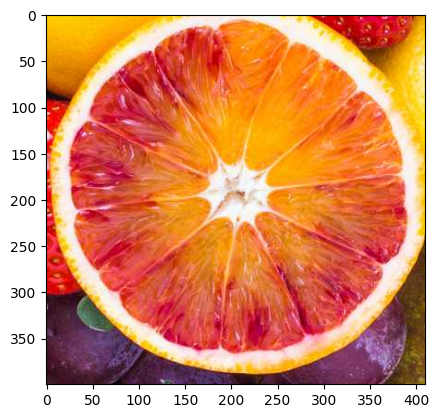

In [1]:
# 1.1 Chọn đối tượng trong ảnh (Trích ảnh con từ ảnh lớn)
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()


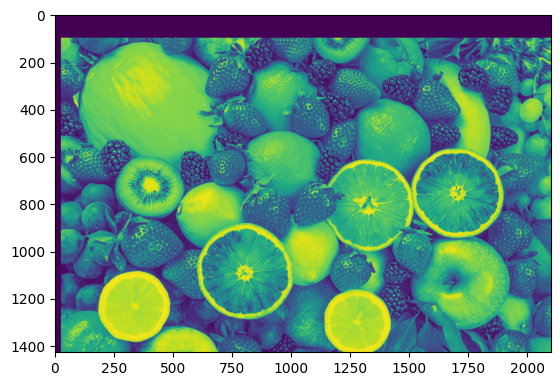

In [2]:
# 1.2 Tịnh tiến đơn
import scipy.ndimage as nd

data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


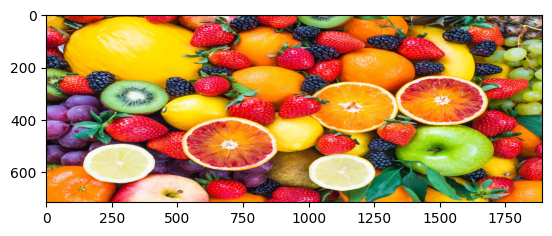

In [6]:
# 1.3 Thay đổi kích thước ảnh
data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

(1427, 2100, 3)


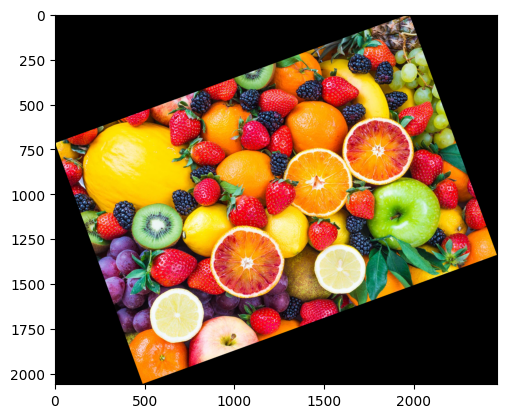

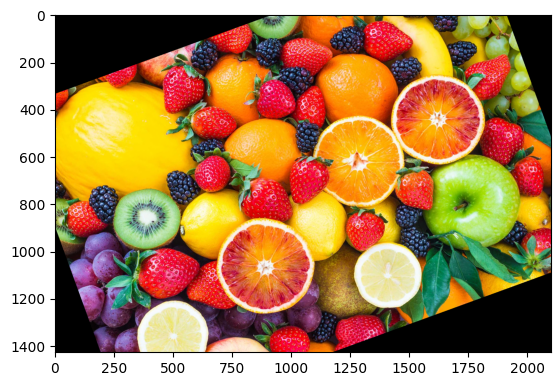

In [7]:
# 1.4 Xoay ảnh
data = iio.imread('fruit.jpg')
print(data.shape)
d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

(309, 515)


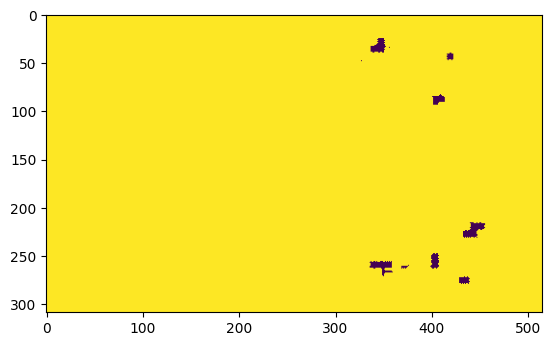

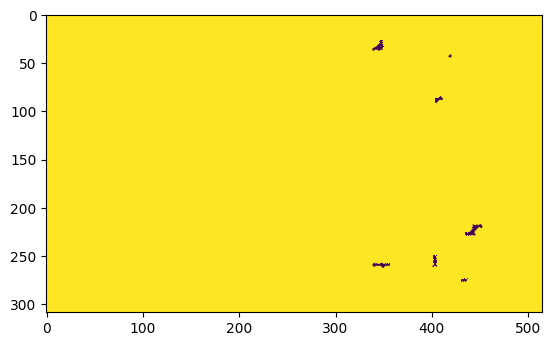

In [9]:
# 1.5 Dilation và Erosion
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

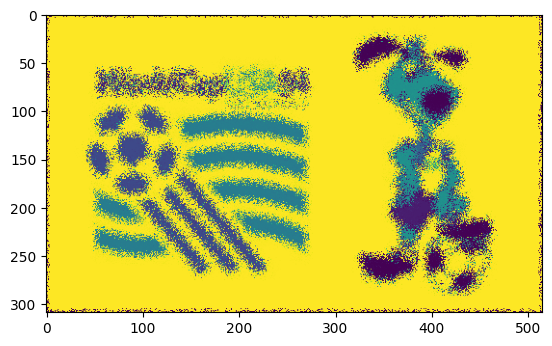

In [10]:
# 1.6 Coordinate Mapping
V, H = data.shape
M = np.indices((V, H))

d = 5
q = 2 * d * np.random.rand(*M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

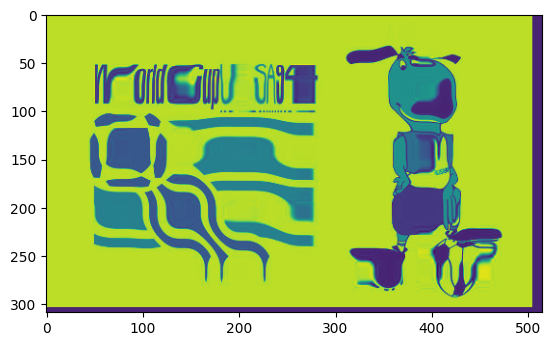

In [11]:
# 1.7 Biến đổi chung (Generic Transformation)
def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode='F')
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()

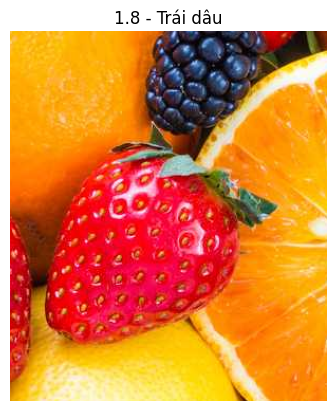

In [20]:
# 1.8 Chọn đối tượng khác (ví dụ: trái dâu)
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Đọc lại ảnh gốc và trích trái dâu
data = iio.imread('fruit.jpg')
strawberry = data[500:850, 950:1250]
plt.imshow(strawberry)
plt.title("1.8 - Trái dâu")
plt.axis('off')
plt.show()


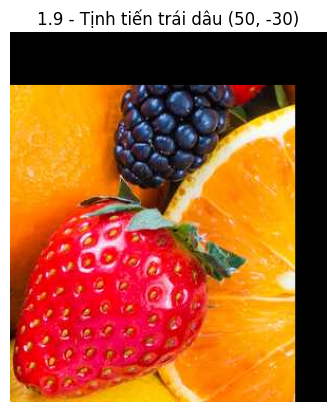

In [21]:
# 1.9 Tịnh tiến trái dâu (50, -30)
shifted = nd.shift(strawberry.astype(float), (50, -30, 0))
plt.imshow(shifted.astype(np.uint8))
plt.title("1.9 - Tịnh tiến trái dâu (50, -30)")
plt.axis('off')
plt.show()


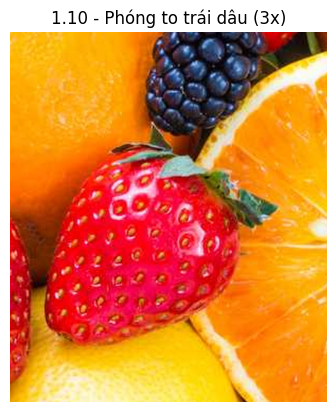

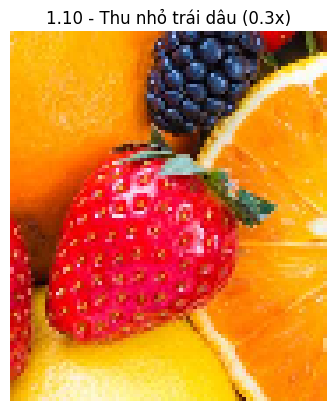

In [22]:
# 1.10 Phóng to gấp 3 lần hoặc thu nhỏ 0.3 lần
zoomed_in = nd.zoom(strawberry, (3, 3, 1))
zoomed_out = nd.zoom(strawberry, (0.3, 0.3, 1))

plt.imshow(zoomed_in.astype(np.uint8))
plt.title("1.10 - Phóng to trái dâu (3x)")
plt.axis('off')
plt.show()

plt.imshow(zoomed_out.astype(np.uint8))
plt.title("1.10 - Thu nhỏ trái dâu (0.3x)")
plt.axis('off')
plt.show()


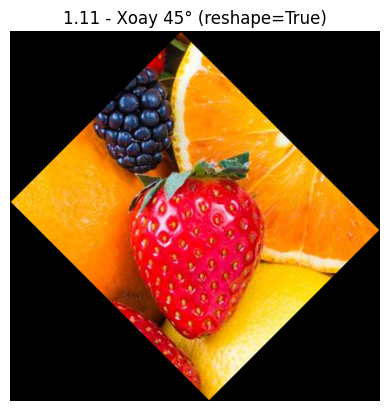

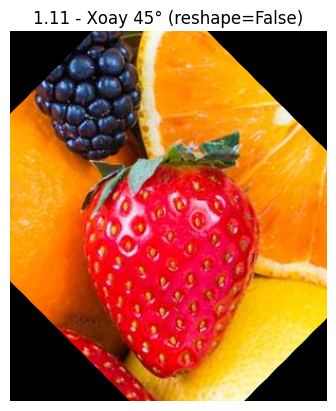

In [23]:
# 1.11 Xoay 45 độ với reshape True và False
rotated_true = nd.rotate(strawberry, 45, reshape=True)
rotated_false = nd.rotate(strawberry, 45, reshape=False)

plt.imshow(rotated_true.astype(np.uint8))
plt.title("1.11 - Xoay 45° (reshape=True)")
plt.axis('off')
plt.show()

plt.imshow(rotated_false.astype(np.uint8))
plt.title("1.11 - Xoay 45° (reshape=False)")
plt.axis('off')
plt.show()

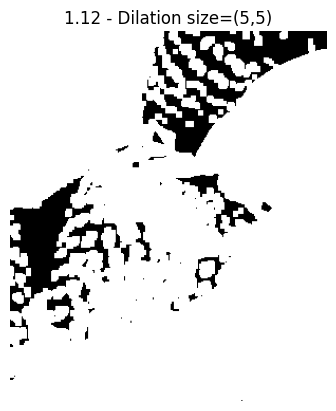

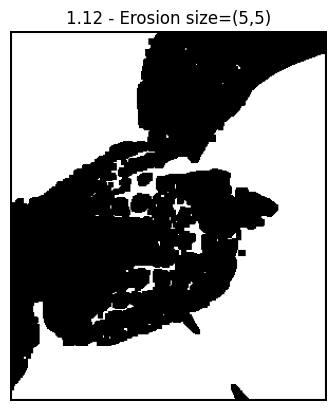

In [24]:
# 1.12 Dilation và Erosion với size=(5, 5)
from scipy.ndimage import binary_dilation, binary_erosion

# Chuyển ảnh trái dâu sang grayscale và nhị phân
gray = np.mean(strawberry, axis=2)
binary = gray > 100

dilated = binary_dilation(binary, structure=np.ones((5, 5)))
eroded = binary_erosion(binary, structure=np.ones((5, 5)))

plt.imshow(dilated, cmap='gray')
plt.title("1.12 - Dilation size=(5,5)")
plt.axis('off')
plt.show()

plt.imshow(eroded, cmap='gray')
plt.title("1.12 - Erosion size=(5,5)")
plt.axis('off')
plt.show()

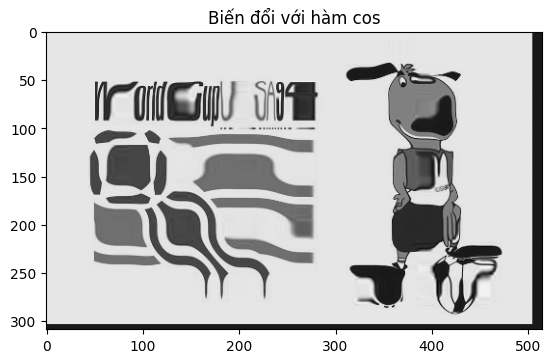

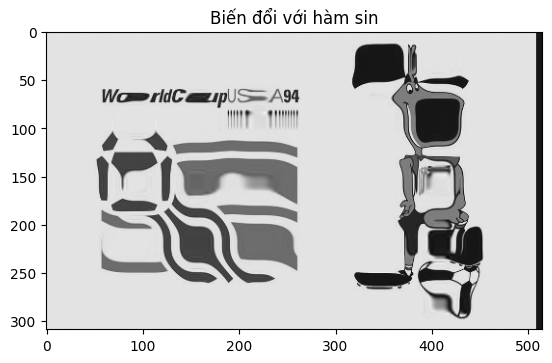

In [26]:
# Đọc ảnh
data = iio.imread('world_cup.jpg', mode='F')  # dùng mode='F' thay cho as_gray=True

# Hàm biến đổi với cos
def GeoFun_Cos(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b

# Hàm biến đổi với sin
def GeoFun_Sin(outcoord):
    a = 10 * np.sin(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1] / 10.0) + outcoord[1]
    return a, b

# Biến đổi với hàm cos
d_cos = nd.geometric_transform(data, GeoFun_Cos)
plt.imshow(d_cos, cmap='gray')
plt.title("Biến đổi với hàm cos")
plt.show()

# Biến đổi với hàm sin
d_sin = nd.geometric_transform(data, GeoFun_Sin)
plt.imshow(d_sin, cmap='gray')
plt.title("Biến đổi với hàm sin")
plt.show()